In [1]:
# Import packages to visualize the classifer
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings

# Import packages to do the classifying
import numpy as np
from sklearn.svm import SVC
warnings.filterwarnings('ignore')


# Wat is een support vector machine

Een support vector machine is een machine learning algoritme die valt onder binaire classificatie algoritmes. Een support vector machine wijst een nieuwe datapunt toe aan de verschillende klassen die het algoritme geleerd heeft tijdens het leerproces.
Tijdens het leerproces van een support vector machine worden met een bepaalde formule, de datapunten opgesplitst door middel van een lineaire lijn of een linear hyperplane. In sommige gevallen zal de data niet met een lineaire lijn of hyperplane opgesplitst kunnen worden. In dit geval zal de support vector machine een transformatie aanbrengen aan de data, waardoor deze wel linear gesplitst kan worden. De support vector machine doet dit door middel van het toevoegen van een extra dimensie.

## Hyperplanes

Een svm gebruikt een hyperplane om de data te classificeren. Beschouw het volgende voorbeeld de roden waarden zijn muizen en de groenen zijn ratten. Een svm bepaald nu een hyperplane (omdat het in een dimensie is dit eigenlijk gewoon een punt). Alle waarden links van de hyperplane worden als muizen gekwalificeerd alle waarden rechts als ratten. De kortste afstand tussen een datapunt en de hyperplane wordt het marge genoemd. 

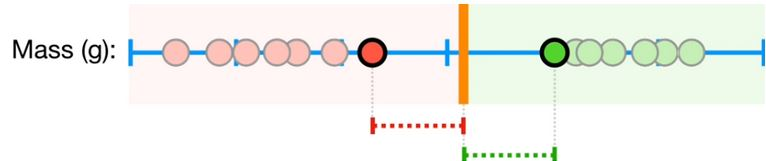

Bij data met meerdere dimensies spreek je natuurlijk niet meer van een punt maar het principe blijft hetzelfde de waarden die aan de ene kant van de hyperplane worden geplaatst vallen onder categorie a en de waarden aan de andere kant in categorie b.

We zullen hieronder er veder op ingenaan met een aantal voorbeelden.

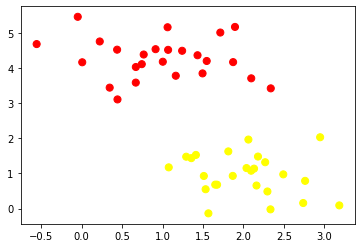

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,random_state=0, cluster_std=0.6) 
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

We weten wat een hyperplane is, dus laten we er drie tekenen hieronder

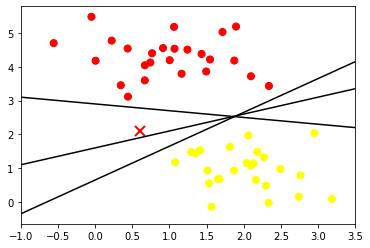

In [3]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);



Er staan nu drie hyperplanes op de grafiek, het probleem is alleen welke is de beste? <br>
Om de beste hyperplane te bepalen bereken je het marge. Het marge is de afstand van het dichtstbijliggende punt (of punten) van categorie a tot de hyperplane en de afstand van het dichtstbijliggende punt (of punten) van categorie b tot de hyperplane. In andere woorden het is de afstand van de dichtstbijliggende datapunten tot de hyperplane.

Om de beste hyperplane te kiezen kies je de hyperplane met het hoogste marge (dus waar de datapunten dichtstbijliggende datapunt(en) het verst van de hyperplane af liggen). In het voorbeeld hierboven is dat de middelste lijn.

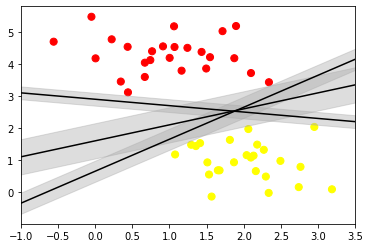

In [4]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

Hierboven staat van elke lijn de marge afgebeeld. Hiermee kunnen we direct zien dat de middelste lijn de grootste marge heeft. Zoals we hierboven al hadden ingeschat. Laten we nu een lineaire model trainen op onze dataset

In [5]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

Deze funcie wordt gebruikt om de hyperplane en de marges te plotten. Het is niet belangrijk dat je precies weet hoe deze werkt.

In [6]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """This function is used to plot the svc.
    It is not important that you exactly know what is going on and how it works"""
    
    
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

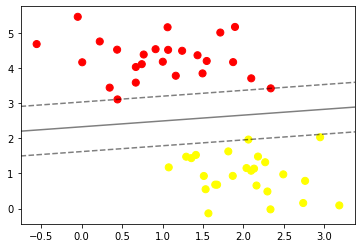

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

Hier zien we onze hyperplane met daarbij twee raaklijnen op de hyperplane. Deze lijnen geven onze marge aan. Deze marges moeten parallel lopen zodat wij het midde van de marges kunnen nemen voor onze hyperplane.

We kunnen hier zien dat de twee extra raaklijnen onze data punten raken. Deze punten worden opgeslagen in de support vector machine deze punten worden namelijk ook support vectors genoemd. Hierboven zien we dat 3 punten geraakt worden door onze  support vector machine. Let op dat het rechtse gele punt dat lijkt geraakt te worden net niet wordt geraakt. Omdat het niet precies op de lijn licht wordt het niet meegeteld.

In [8]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

En we kunnen zien dat er ook 3 punten staan in onze support vector machine staan. 

Maar wat gebeurt er dan met de punten die verder weg van de support vector machine staan? Deze punten worden voor het grootste deelgewoon genegeert. Hieronder staan een plot waarbij er veel meer data achter de support vectors staat, maar de support vector staat gewoon op dezelfde plek.

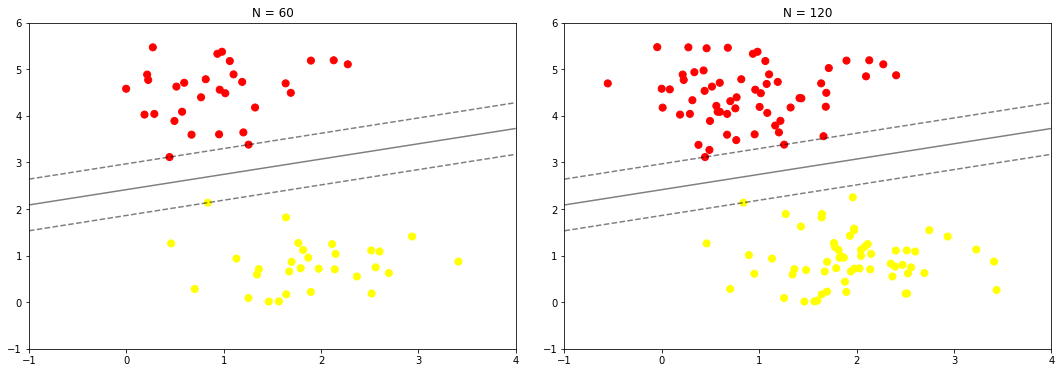

In [9]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

Het enige wat dus effect heeft op waar de hyperplane licht en dus hoe svm's worden bepaald is waar het datapunt van categorie a dat het dicht bij categorie b licht licht en niet de grootte van de dataset. Dit maakt support vector machines erg geschikt voor datasets met weinig data maar erg gevoelig voor datasets met veel uitschieters.

Maar als er opeens datapunten dichter bij de hyperplane komen, dan verandert de gehele marge (maximale loodrechte afstand), en dus verandert de gehele hyperplane. Probeer hieronder de slider aan te passen en kijk wat er gebeurt. 

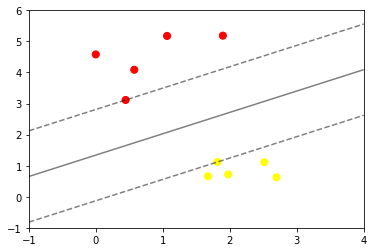

In [10]:
from ipywidgets import interact, fixed
interact(plot_svm, N=(10, 200,5), ax=fixed(None));

Support vector machines zijn dus heel handig als je data wilt schijden tussen twee groepen. Maar wat gebeurt er als we een niet lineaire dataset hebben. 

Maar als er opeens datapunten dichter bij de hyperplane komen, dan verandert de gehele marge (maximale loodrechte afstand), en dus verandert de gehele hyperplane. Probeer hieronder de slider aan te passen en kijk wat er gebeurt. 

<h2>Transformatie naar een hogere dimensie</h2>

Soms is het niet mogelijk om de data niet lineair te splitsen zoals hier onder.
In zo’n geval maakt de support vector machine een transformatie aan de data, waardoor de data wel lineair opgesplitst kan worden. Om deze transformatie te kunnen uitvoeren maakt de support vector machine gebruik van wiskundige kernel functies. Twee daarvan zijn de polynomial kernel en de radial kernel, deze functie berekend de formule voor de extra as, die nodig is om de data lineair op te kunnen splitsen. Verder in de opdrachten zie je een voorbeeld zo'n datatransformatie.

Zoals we verwachten, de support vector machine bakt er helemaal niets van. Maar de support vector machine heeft een trucje achter de hand. Maar hiervoor moeten we niet lineaire gaan denken, maar multidimentionaal. 

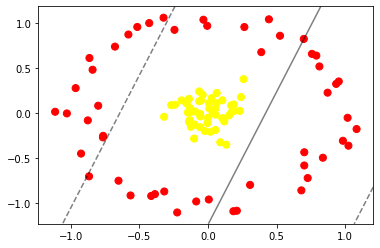

In [11]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

Om in hogere dimenties te gaan moeten we een nieuwe functie gebruiken. Deze functie heet de Radial kernal. Om deze toe te passen hebben we de formule, dit is de radial kernal die we gaan gebruiken voor de deze cirkel.

$$exp(-1(x^2 + y^2))$$.

Op het moment hebben we een array X, deze array bestaat uit een lijst met alle X en Y coordinaten.

In [12]:
X[:5]

array([[-0.03218448,  1.04158473],
       [ 0.78990459,  0.64157791],
       [ 0.18918164,  0.0966707 ],
       [ 0.98350245, -0.30810656],
       [ 0.10502281, -0.05628693]])

Om de radial fuctie te kunnen maken gaan we de X coordinaat en de Y coordinaat in het kwadraat bij elkaar optellen. Hierdoor zouden we één enkele lijst moeten overhouden met daarin de som van X en Y (in het kwadraat).

## opdracht 

Bepaal met de redial kernial de nieuwe coordinaat

In [13]:
# gebruik r voor de data waarin de nieuwe coordinaten komen te staan
r = []

for val1,val2 in X:
    r.append((-1 * (val1**2 + val2**2))**2)

Nu we de $X^2$ en de $Y^2$ hebben opgeteld hebben we een extra derde waarde gekregen. Deze waarde geven we nu mee aan elke coordinaat als een Z. Hierdoor komt onze plot in 3D. Als je de formule goed heb ingevuld kan je dat direct zien.

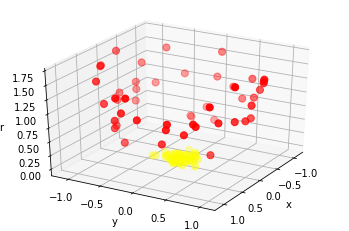

In [14]:
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
import matplotlib


def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=(0, 90), azip=(-180, 180),
         X=fixed(X), y=fixed(y));

In de grafiek hierboven zie je hoe de grafiek van 2D naar 3D veranderd

Als we de radial kernal goed hebben toe gepast dan zien we een duidelijk verschil tussen alle gele en rode coordinaten. We kunnen hier nu een hyperplane doorheen trekken op ongeveer 0.7 r. De vraag is hoe bepalen we wat de beste radial kernal/formule is om de date te transformeren.

We hadden in ons vorige voorbeeld de Gaussian radial basis function gebruikt. De gehele formule is:

$$exp(-\gamma|| \vec{X_i} - \vec{X_j} ||^2)$$

We hadden hier voor een gamma($\gamma$) van 1 gekozen, we leggen later uit wat gamma inhoudt.<br>
Daarvoor heeft sklearn een functie, we kunnen kiezen wat voor soort kernel we gaan gebruiken. De kernal die we nu aleen gebruikt hebben is de lineaire, nu gaan we kijken naar de radial basic function. Deze functie kijkt in oneindig dimenties en bepaald door middel van een wiskundige formule wat de beste hyperplane is.

In [15]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

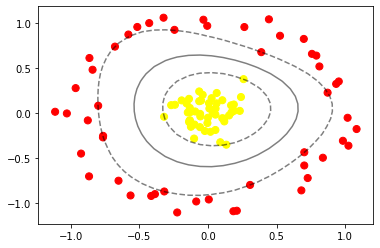

In [16]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');



Hier hebben we een hyperplane getekend op 0.7 r, daarna hebben we de data terug gezet in 2D. We kunnen nu heel mooi en direct zien wat er gebeurt als we in hogere dimenties gaan werken.

Als laatste hebben we een paar waardes die bepalen hoe een support vector machine werkt.
<br>
Alle functies maken gebruik van de C:
- C bepaald hoe zwaar de overige data punten meetellen 

Verder heeft elke kernal persoonlijke variabelen
- Lineaire heeft geen variabelen.
- Polynomen hebben de variabel Degree.
    - dit betekent de hoeveelste macht de data getransformeerd in wordt.
- De radial kernal heeft de waarde gamma.
    - De gamma bepaald hoe sterk een punt is. 
        - een hogere gamma betekent overfitten, want dan ga je per punt kijken


Laten we nu gaan kijken wat de C betekent. Hieronder staan een functie,

In [17]:
def plot_svm_C(X,y,model,C):  
    ''' X zijn de coordinaten
        y zijn de classes
        model is de SVM machine, al gefit op de data.
        C is de huidige c van de SVM
        '''
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model)
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=500, lw=1, facecolors='none');
    plt.title('C = {}'.format(C), size=14)
    plt.show()

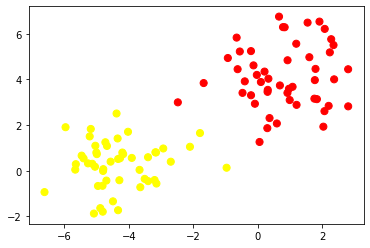

In [18]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=3, cluster_std=1.2)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

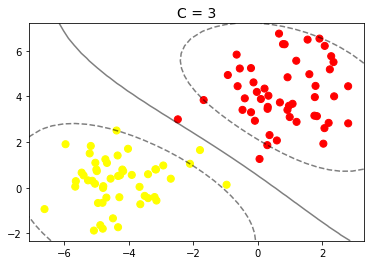

In [19]:
# test hieronder op de data met verschillende soorten C.
# Gebruik hiervoor plot_svm_C om je support vector machine te plotten.
C = 3
clf = SVC(kernel='rbf', C=C)
clf.fit(X, y)

plot_svm_C(X,y,clf,C)


Hier kunnen we duidelijk aan de marge zien wat C doet. Als laatste twee voorbeelden wat er gebeurt als je de gamma aanpast.

In [20]:
def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=[cmap(idx)], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

In [21]:
def plot_vsm_g(X,y,svm,gamma_a=1): 
    '''stop hier de support vector machine in, en dan komt er een plot uit
    X zijn de coordinaten
    y zijn de classes
    svm is de support fector machine
    gamma is de huidige gamma van de support vector machine'''
    plt.figure(1)
    y = [ -1 if value == 0 else value for value in y]
    plot_decision_regions(X, y, classifier=svm)
    print(gamma_a)
    plt.show()

1


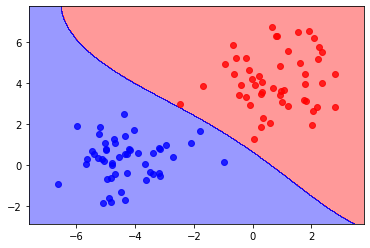

In [22]:
# test hieronder op de data met 3 verschillende soorten gamma.
# TIP: gebruik de juiste kernal die gamma gebruikt. 

# maak vector machine aan
# fit de vector machine op de data
# stuur hem door naar de plot_vsm_g functie

clf = SVC(kernel='rbf', C=5)
clf.fit(X, y)

plot_vsm_g(X,y,clf)

# Face Recognition

Laten we een support vector machine gaan testen op een face recognition dataset. Hiervoor gebruiken wij de sklearn. 

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Tony Blair']
(1217, 62, 47)


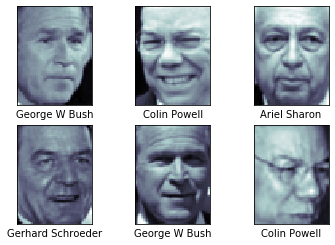

In [23]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=75)
print(faces.target_names)
print(faces.images.shape)

fig, ax = plt.subplots(2, 3)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

Uit de database heben we een paar gezichten gehaald.

In [41]:
from sklearn.svm import SVC
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
from sklearn.decomposition import PCA
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
from sklearn.pipeline import make_pipeline

# Stap 1
# Maak door middel van Sklearn een pca met de parameters, n_components=150 en whiten=True. 
# Je mag zelf een random state kiezen, je kan ook met de PCA waardes veranderen als je het wilt proberen te verbeteren.

pca = PCA(n_components=150,whiten=True,random_state=None)

# Stap 2
# Maak door middel van Sklearn een SVM. 
# Gebruik hier SVC voor met de paramaters: kernal='radial' en class_weight='balanced'.
# Plaats hier noch geen Gamma of C bij. Je mag wel met de andere parameters testen om te proberen je model te verbeteren.

svc = SVC(kernel='rbf',class_weight='balanced')


# Stap 3
# Als laatste gaan we een model maaken door middel van een pipeline. Gebruik make_pipeline(pca,svc) hiervoor.

model = make_pipeline(pca,svc)

In [38]:
from sklearn.model_selection import train_test_split

# stap 4
# maak een train en test set van de faces.data en de faces.target.

X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, test_size=0.33, random_state=42)

In [36]:
y_train

array([4, 4, 3, 4, 3, 3, 3, 5, 3, 4, 3, 5, 3, 2, 5, 3, 3, 4, 3, 1, 3, 3,
       1, 4, 1, 4, 0, 3, 0, 2, 3, 3, 3, 1, 3, 1, 3, 4, 2, 0, 1, 1, 4, 0,
       3, 0, 3, 0, 3, 2, 5, 4, 3, 2, 3, 3, 2, 3, 1, 3, 5, 3, 1, 3, 4, 3,
       3, 3, 3, 2, 4, 1, 5, 1, 1, 1, 3, 3, 1, 3, 0, 2, 3, 5, 3, 1, 2, 0,
       2, 1, 4, 4, 5, 1, 3, 3, 3, 4, 3, 3, 3, 5, 1, 3, 3, 5, 3, 3, 3, 5,
       3, 3, 5, 5, 3, 3, 0, 0, 3, 0, 1, 1, 5, 5, 0, 3, 4, 3, 3, 2, 5, 4,
       0, 5, 3, 0, 3, 4, 3, 2, 1, 0, 4, 4, 3, 1, 1, 1, 2, 1, 0, 3, 3, 3,
       1, 3, 4, 5, 5, 5, 2, 1, 5, 1, 5, 4, 2, 1, 2, 3, 3, 1, 4, 3, 3, 2,
       3, 3, 1, 4, 3, 2, 1, 4, 1, 2, 4, 0, 3, 5, 3, 4, 4, 3, 3, 3, 2, 5,
       1, 3, 3, 3, 2, 3, 0, 3, 4, 3, 3, 3, 3, 5, 3, 2, 5, 1, 2, 3, 3, 1,
       3, 2, 4, 3, 5, 3, 3, 3, 2, 1, 1, 2, 1, 5, 3, 3, 3, 3, 1, 1, 3, 3,
       1, 3, 4, 3, 5, 1, 2, 5, 1, 1, 3, 1, 5, 1, 5, 1, 0, 3, 4, 1, 3, 0,
       3, 1, 3, 3, 3, 4, 1, 3, 5, 2, 1, 4, 0, 4, 1, 3, 3, 2, 2, 2, 2, 1,
       3, 3, 1, 3, 5, 0, 4, 5, 3, 5, 5, 1, 3, 0, 3,

In [50]:
from sklearn.model_selection import GridSearchCV
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

# stap 5
# Van ons model willen de de beste gamma en c vinden, hiervoor gaan we gridsearchCV gebruiken.
# Maak een dictionary met de keys svc__C en svc__gamma. Deze waardes gaan we gebruiken voor onze C en Gamma.
# Als values in onze dictionary plaatsen wij een lijst met de verschillende waardes die we willen testen.
# let op, hoe meer waardes je test, hoe langer het duurt. Gebruik 3/4 waardes voor de C & G.

param_grid = {'svc__C':[3], 'svc__gamma':[0.003]}

# stap 6
# Nu willen we gaan zoeken wat de beste parameters zijn. 
# Hiervoor maken we een grid aan met daarin het model en de verschillende parameters.
# Gebruik hiervoor de code: "grid = GridSearchCV(model, param_grid)"
grid = GridSearchCV(model, param_grid)

# stap 7
# Fit deze grid op onze training set, dit kan een tijdje duren.

grid.fit(X_train,y_train)
# stap 8
# Nu we elk van deze parameters hebben getest willen we weten wat de beste zijn. Hiervoor gebruiken we:
print(grid.best_params_)

{'svc__C': 3, 'svc__gamma': 0.003}


Als dit allemaal gelukt is gaan we nu testen hoe goed ons model het heeft gedaan.

In [51]:
model = grid.best_estimator_
yfit = model.predict(X_test)

Hieronder zien we een paar test voorbeelden, wat rood is heeft ons algoritme verkeerd voorspeld.

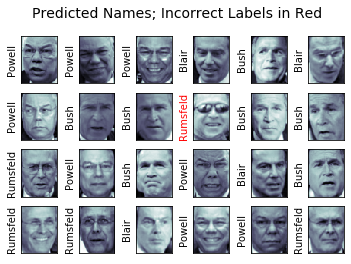

In [52]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(X_test[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == y_test[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

Laten we nu gaan kijken naar alle data van de testset.

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test, yfit, target_names=faces.target_names))


precision    recall  f1-score   support

     Ariel Sharon       0.85      0.71      0.77        24
     Colin Powell       0.83      0.81      0.82        79
  Donald Rumsfeld       0.81      0.67      0.73        43
    George W Bush       0.85      0.93      0.89       183
Gerhard Schroeder       0.81      0.93      0.87        28
       Tony Blair       0.87      0.73      0.80        45

         accuracy                           0.84       402
        macro avg       0.84      0.80      0.81       402
     weighted avg       0.84      0.84      0.84       402



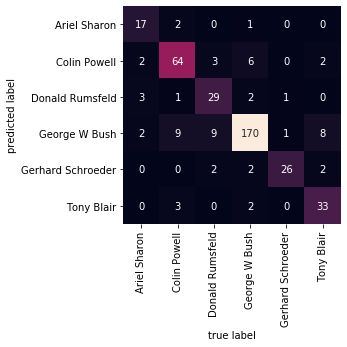

In [54]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(y_test, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

# References

https://chrisalbon.com/machine_learning/support_vector_machines/svc_parameters_using_rbf_kernel/ <br>
https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html <br>
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC <br>
https://scikit-learn.org/stable/auto_examples/applications/plot_face_recognition.html <br>
https://www.youtube.com/watch?v=efR1C6CvhmE <br>
https://medium.com/@dhiraj8899/top-4-advantages-and-disadvantages-of-support-vector-machine-or-svm-a3c06a2b107<br>
https://www.quora.com/What-are-the-disadvantages-of-SVM-algorithms?share=1